In [ ]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


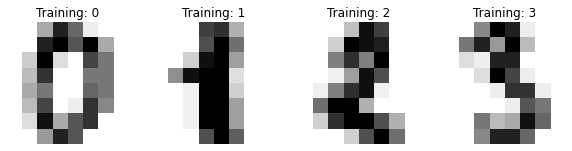

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


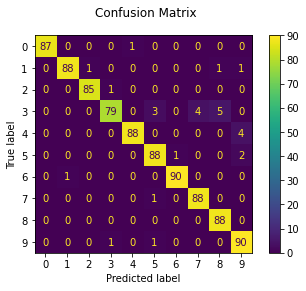

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
labeled_img = [] # Create an list to store labeled images

In [ ]:
cd ..

/content


<IPython.core.display.Javascript object>

Saved to Data/img-52.jpg


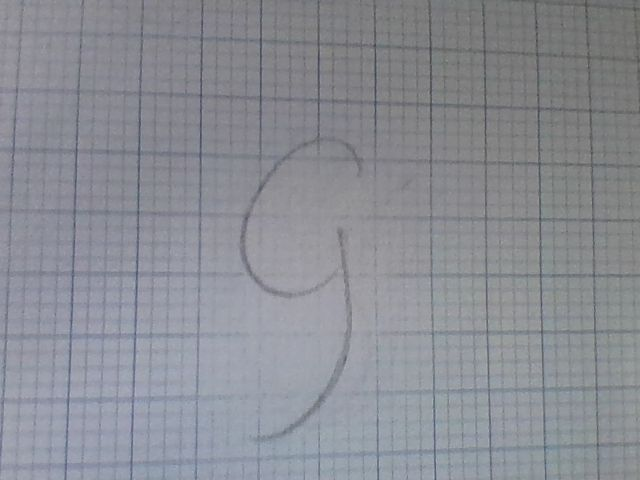


Please label taken image: 9


In [ ]:
""" Take photo -> Label -> Predict (Cái này để chụp xong chạy)"""
import os
from IPython.display import Image

dir = 'Data' # Create a 'Data' directory conatains images

if not os.path.exists(dir):  # Check if directory existed or not
    os.makedirs(dir)

def img_name_format(idx):
  return f'{dir}/img-{idx}.jpg'

try:
  i = 0 # Count variable avoid duplicating img
  while os.path.isfile(img_name_format(i)):
    i+=1
  filename = take_photo(img_name_format(i))
  print(f'Saved to {filename}')
  
  display(Image(filename)) # Display image taken

  while True:
    img_label = int(input("\nPlease label taken image: "))
    if img_label in range(0,10):
      labeled_img.append([img_label, filename])
      break
    else:
      continue # User supposed to label img again if img_label not invalid

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
  # Source: https://stackoverflow.com/questions/54389727/opening-web-camera-in-google-colab


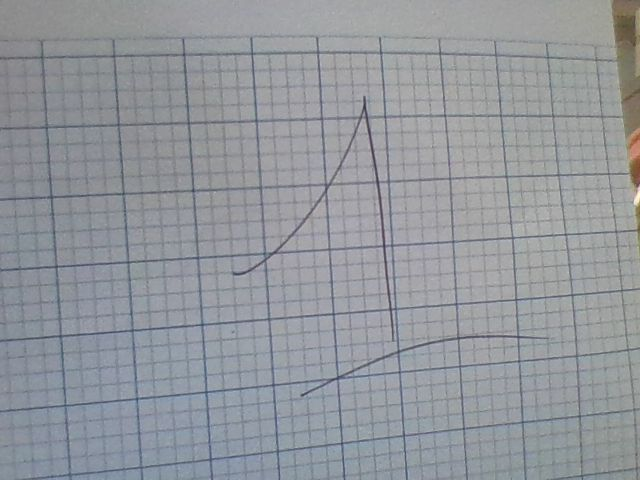


Number predicted:  [9] 



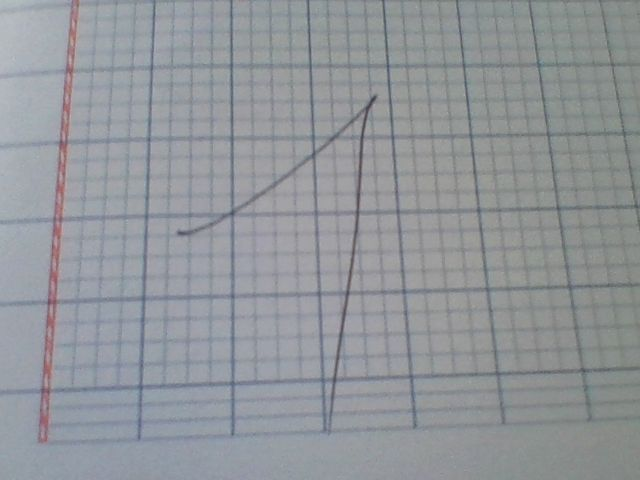


Number predicted:  [7] 



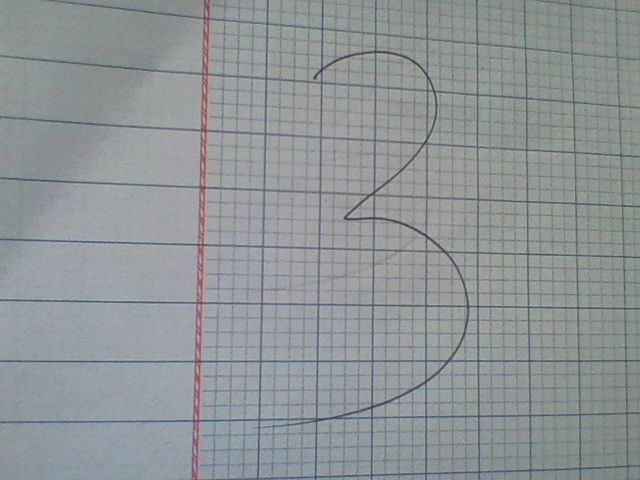


Number predicted:  [3] 



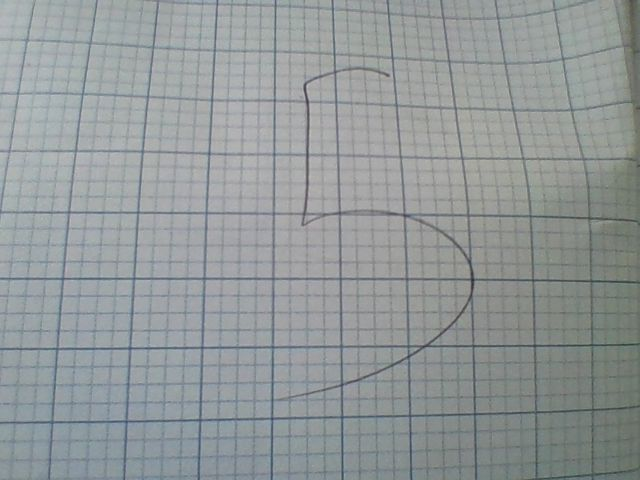


Number predicted:  [1] 



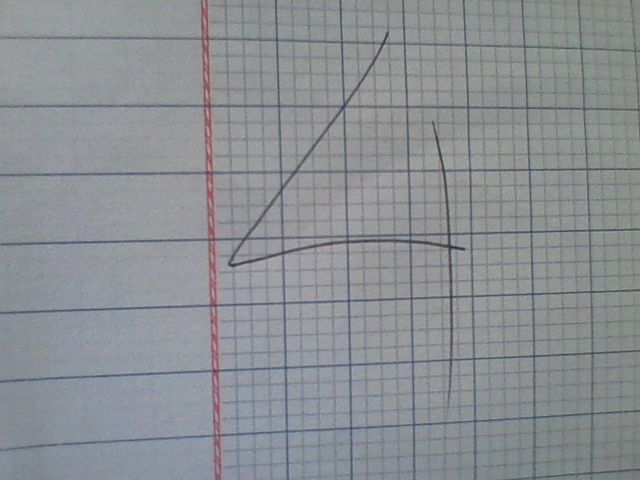


Number predicted:  [7] 



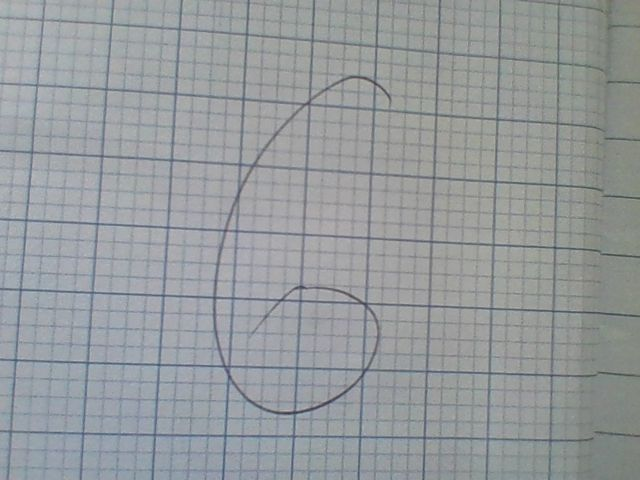


Number predicted:  [2] 



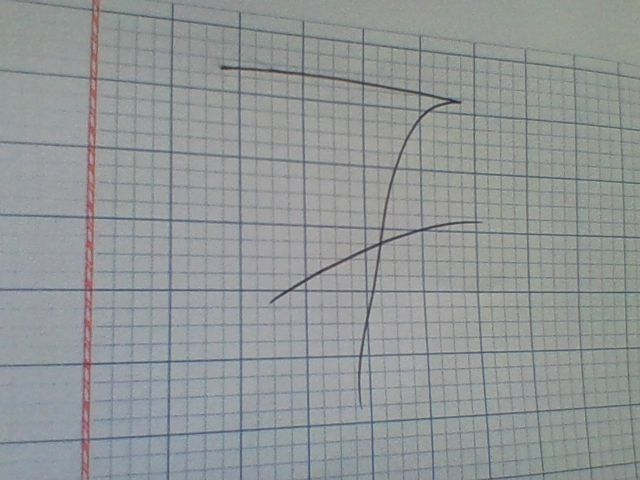


Number predicted:  [7] 



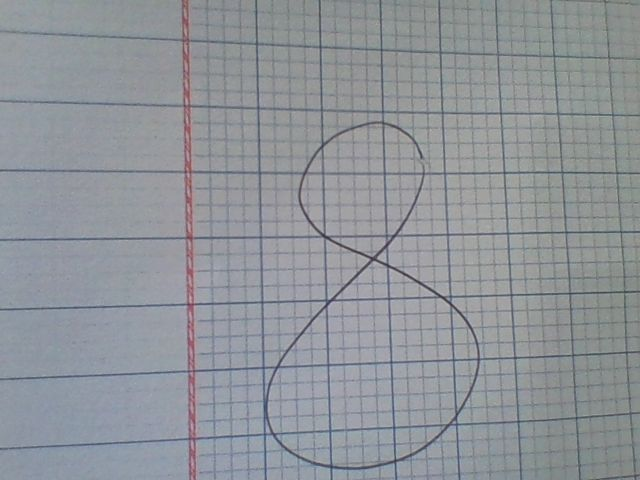


Number predicted:  [3] 



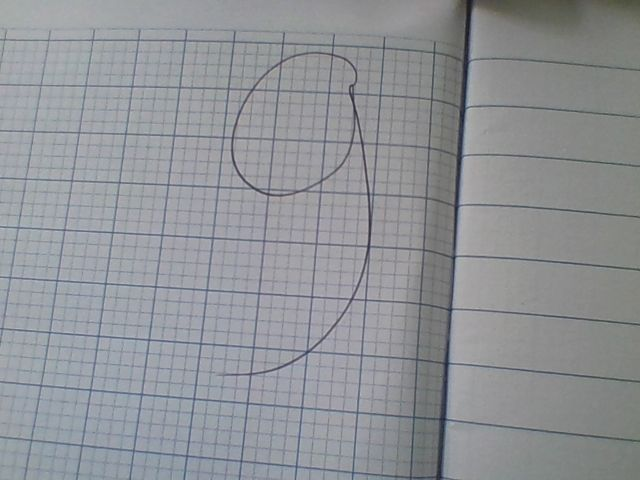


Number predicted:  [7] 



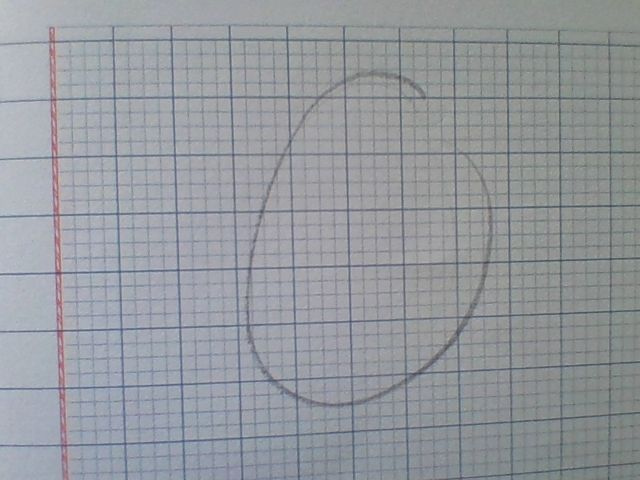


Number predicted:  [1] 



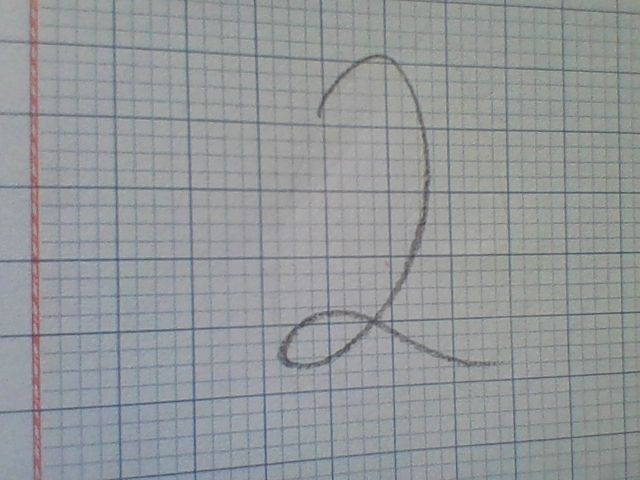


Number predicted:  [2] 



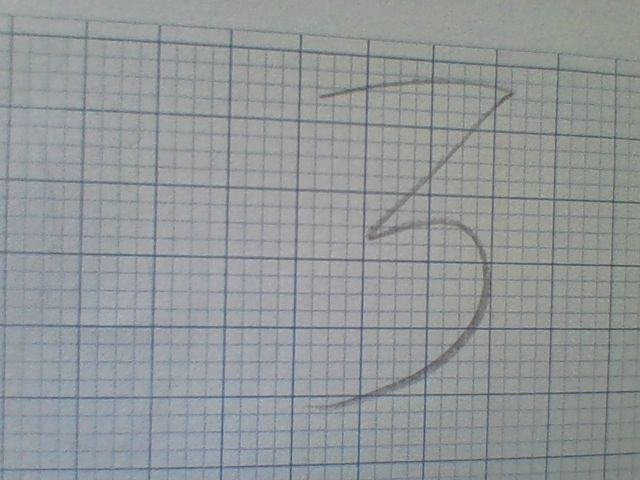


Number predicted:  [1] 



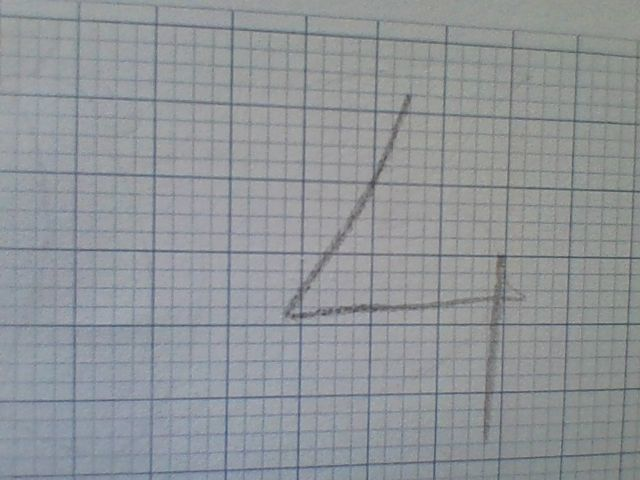


Number predicted:  [1] 



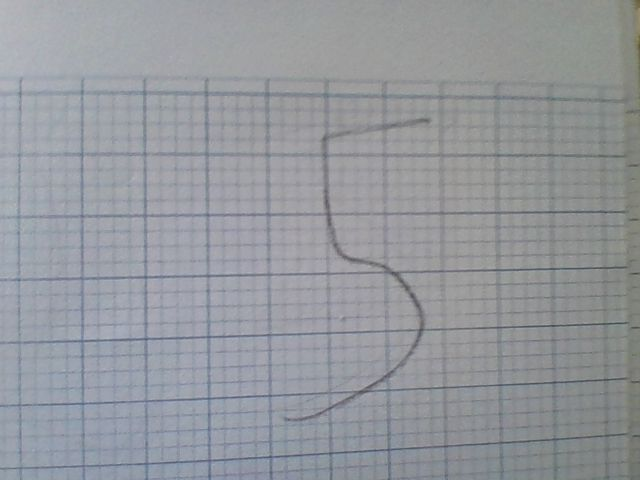


Number predicted:  [1] 



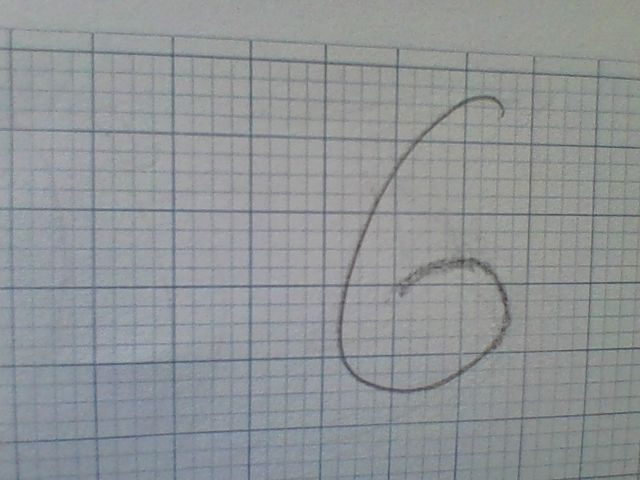


Number predicted:  [1] 



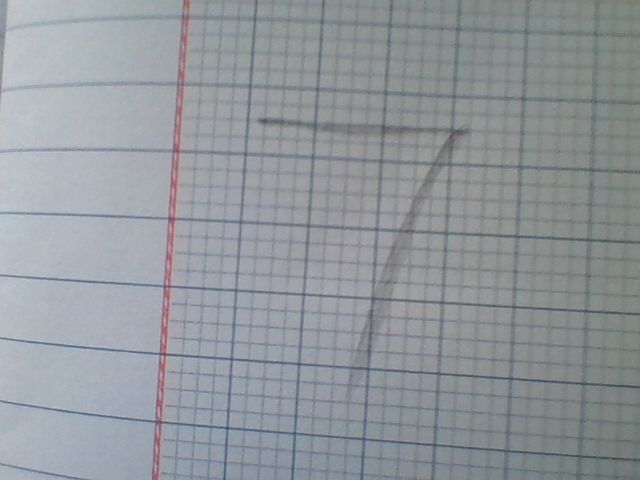


Number predicted:  [2] 



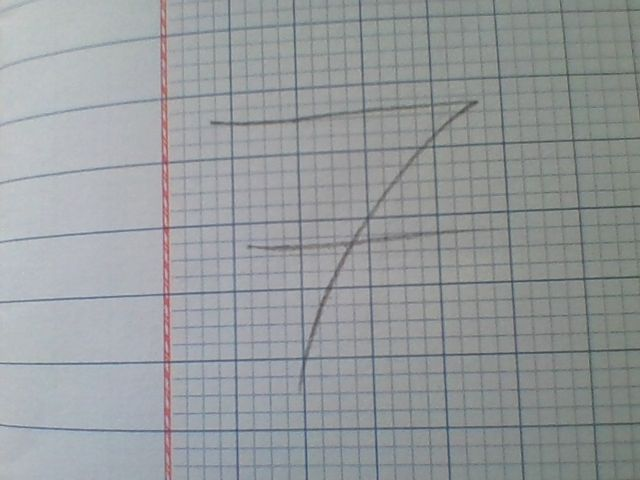


Number predicted:  [9] 



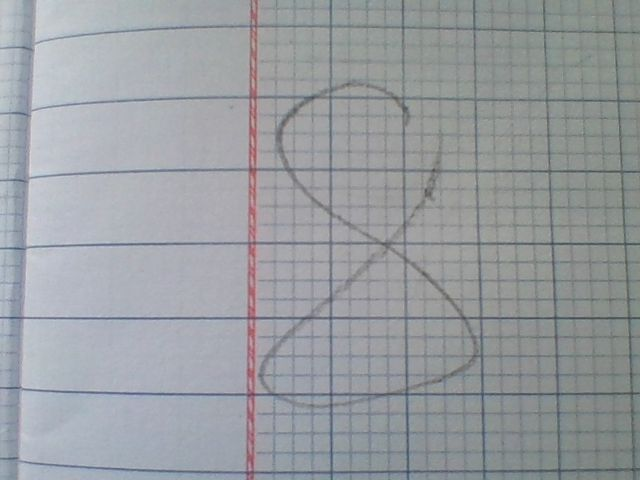


Number predicted:  [2] 



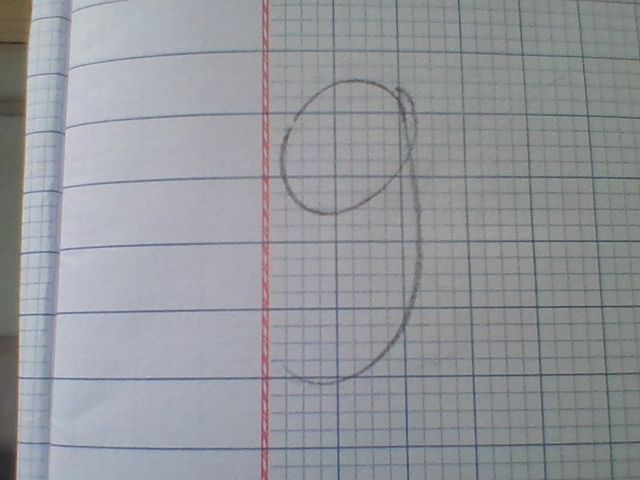


Number predicted:  [1] 



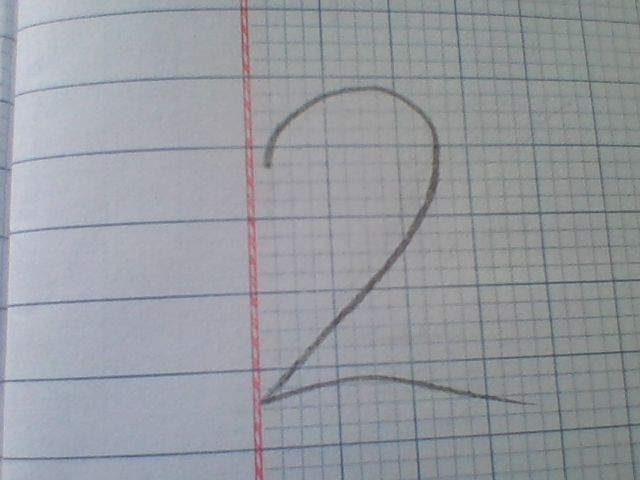


Number predicted:  [2] 



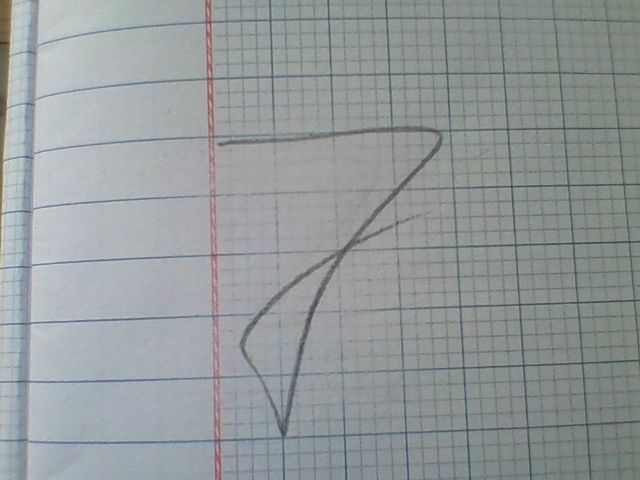


Number predicted:  [2] 



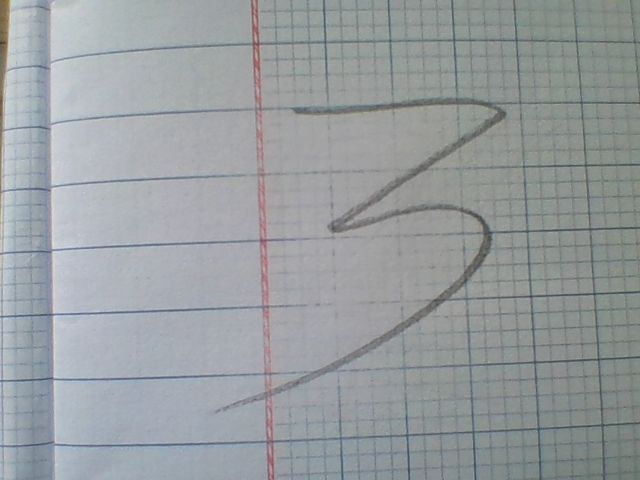


Number predicted:  [1] 



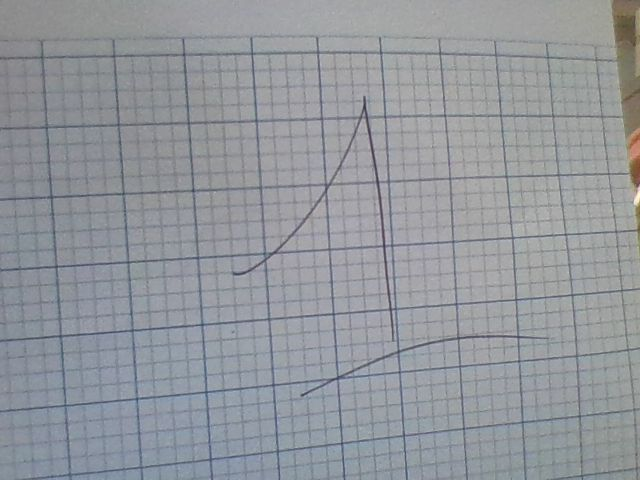


Number predicted:  [9] 



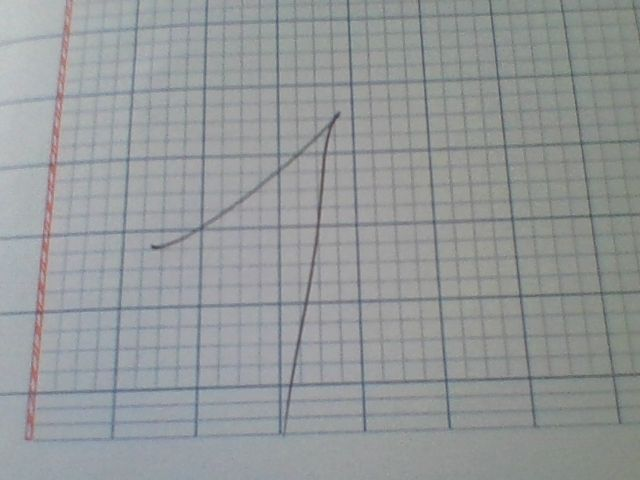


Number predicted:  [7] 



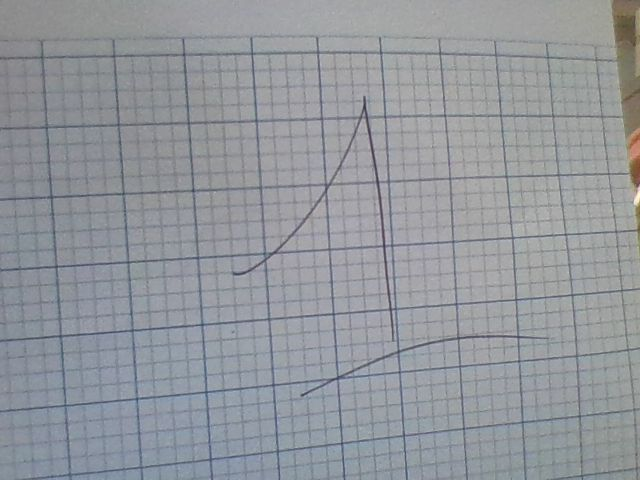


Number predicted:  [9] 



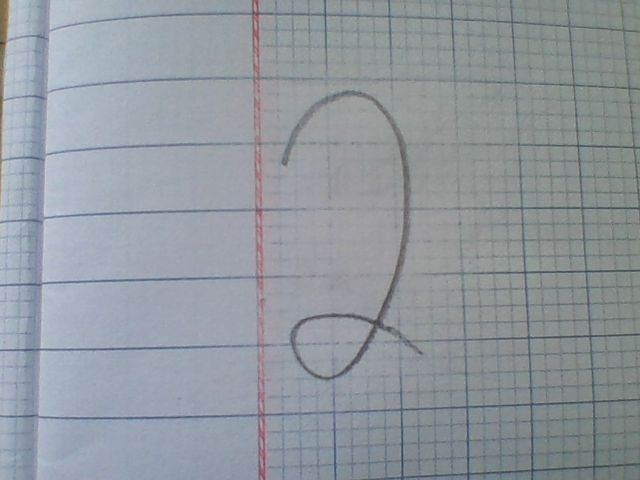


Number predicted:  [1] 



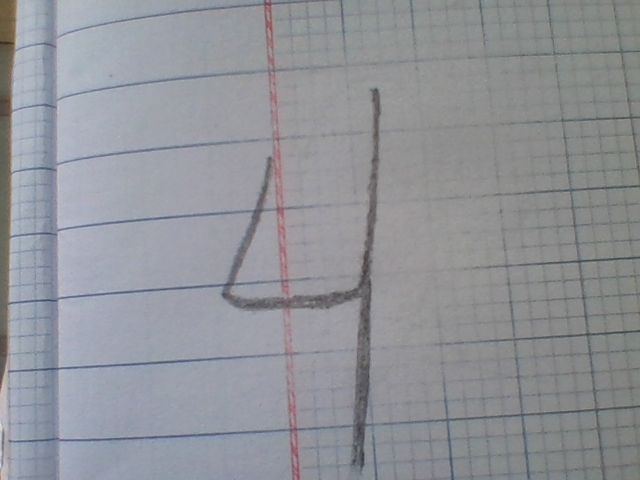


Number predicted:  [1] 



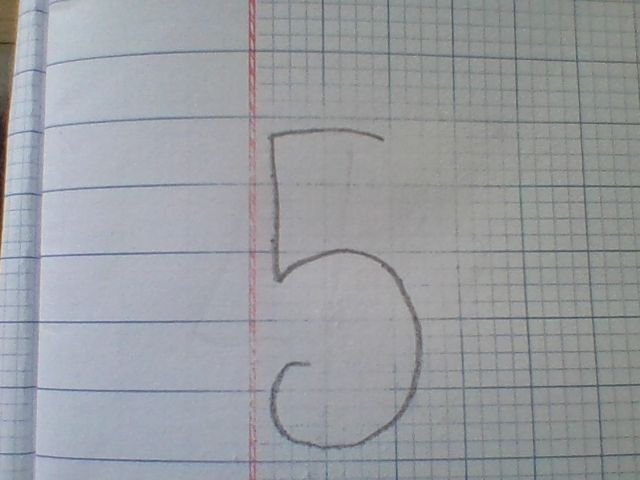


Number predicted:  [1] 



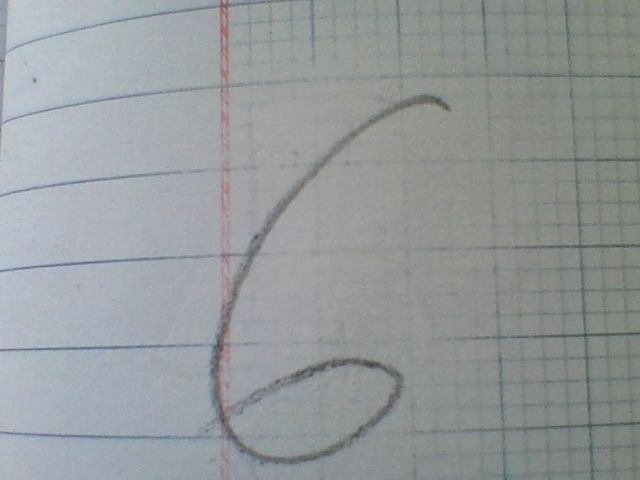


Number predicted:  [2] 



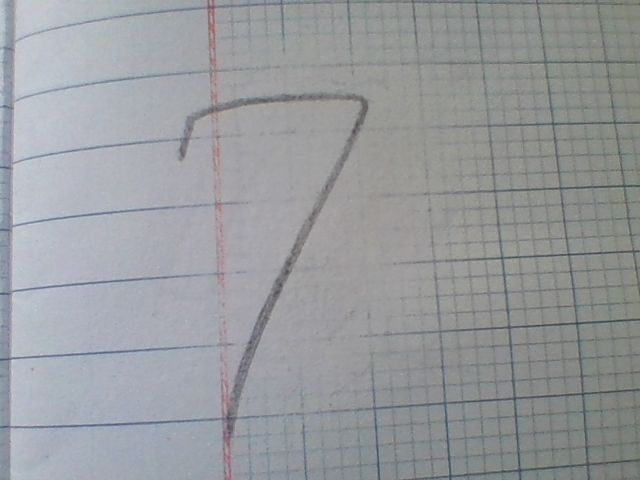


Number predicted:  [1] 



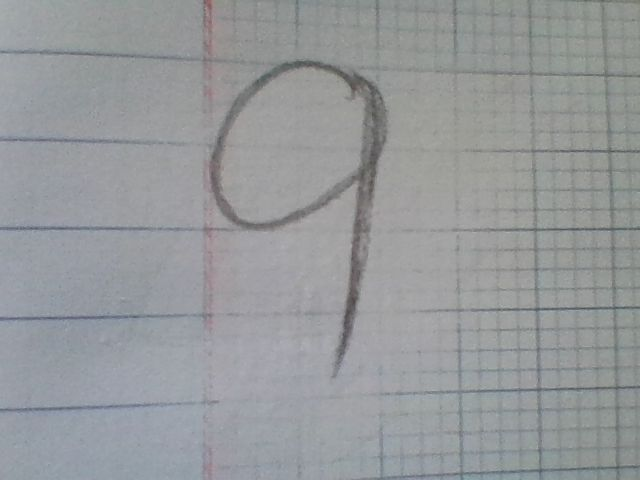


Number predicted:  [7] 



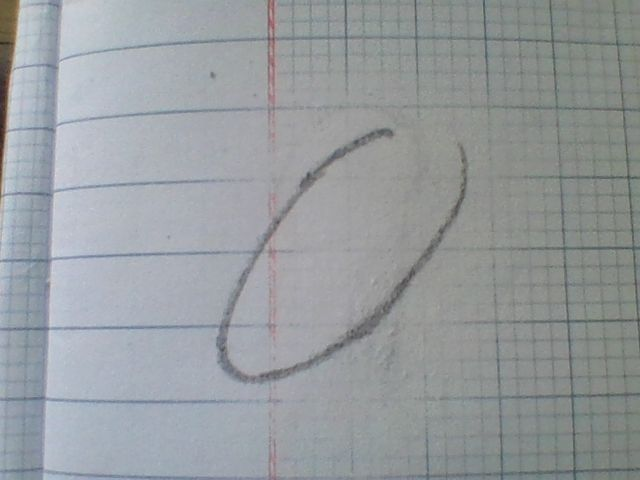


Number predicted:  [1] 



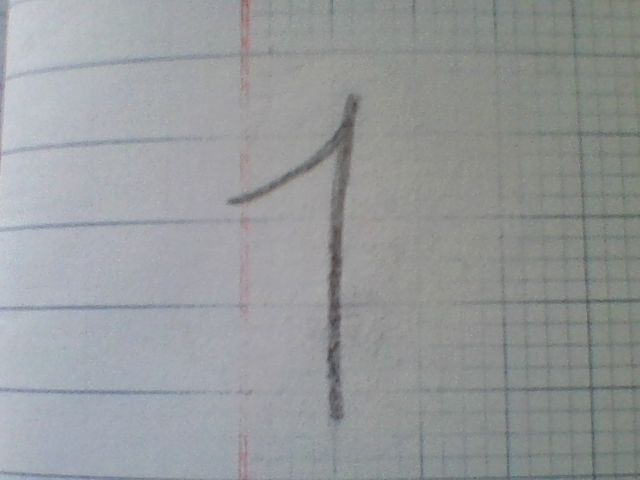


Number predicted:  [1] 



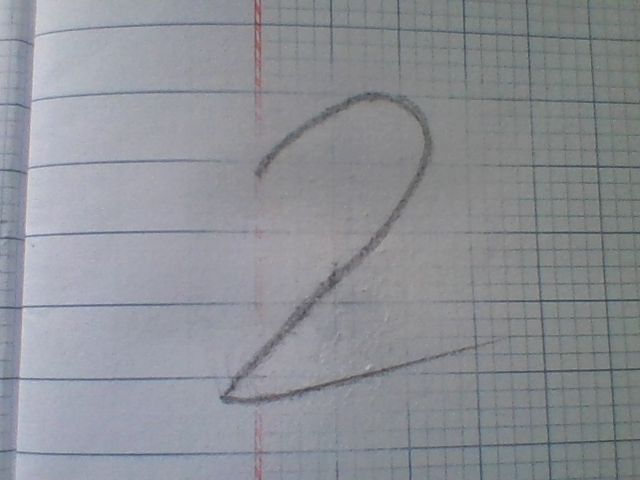


Number predicted:  [2] 



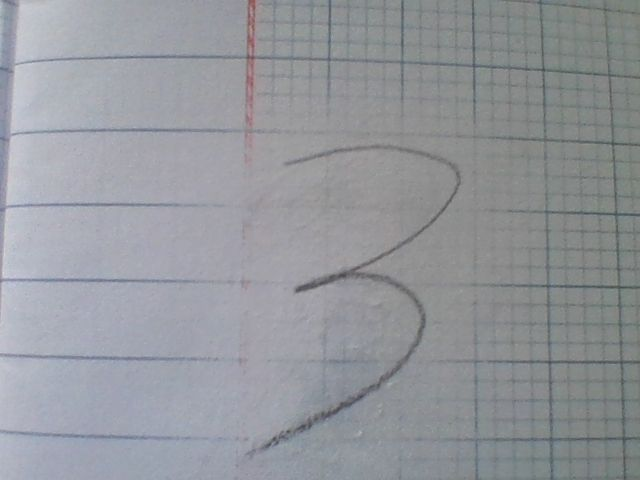


Number predicted:  [7] 



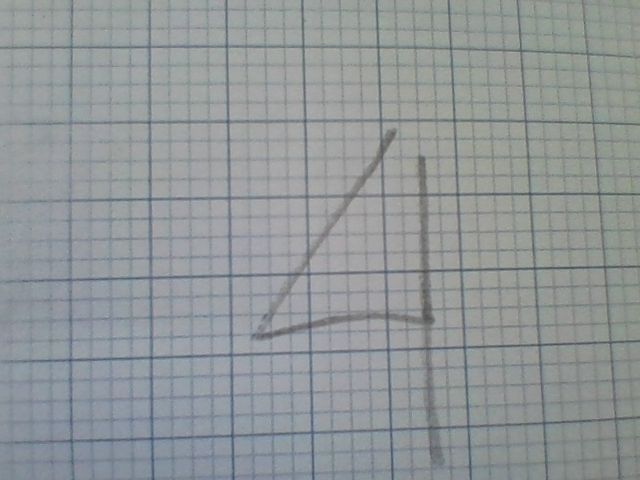


Number predicted:  [9] 



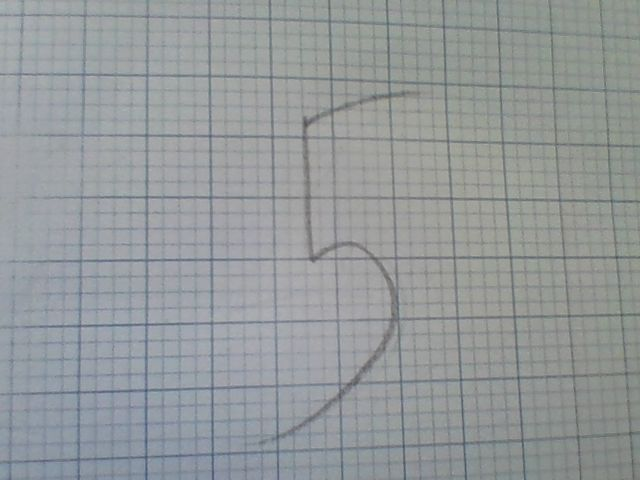


Number predicted:  [2] 



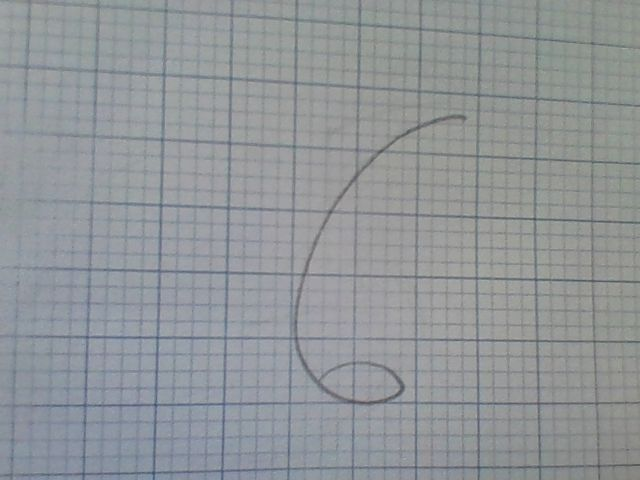


Number predicted:  [2] 



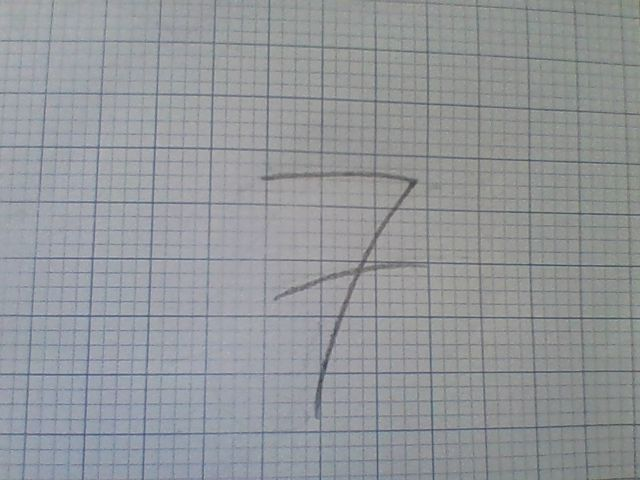


Number predicted:  [2] 



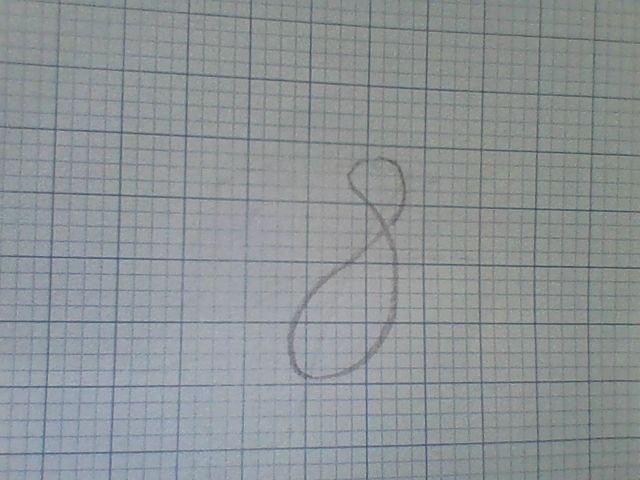


Number predicted:  [1] 



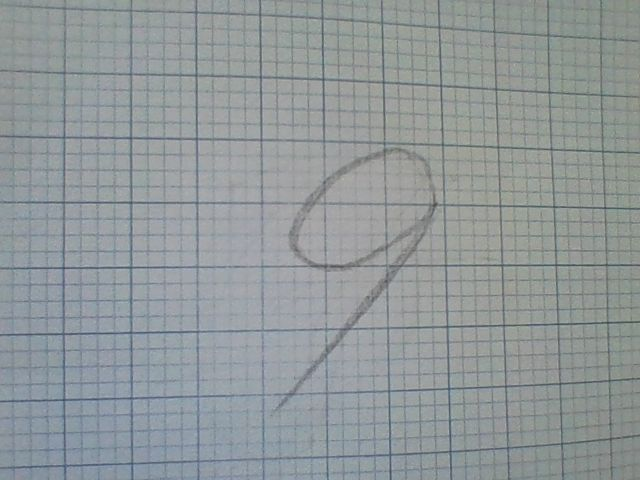


Number predicted:  [1] 



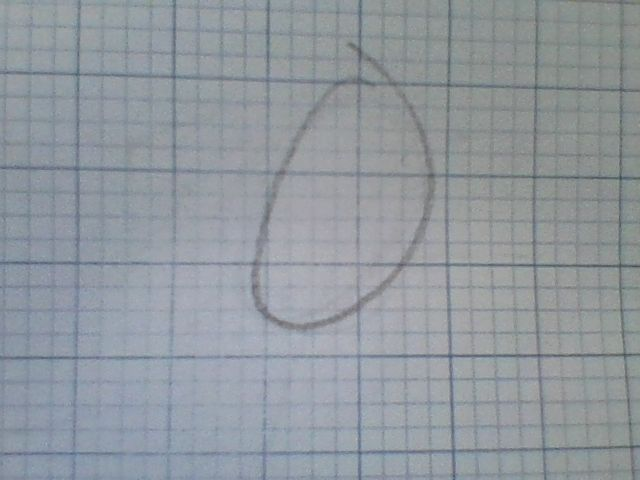


Number predicted:  [1] 



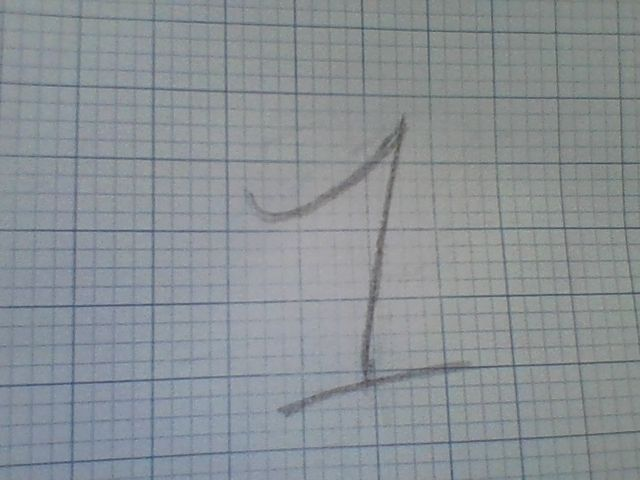


Number predicted:  [1] 



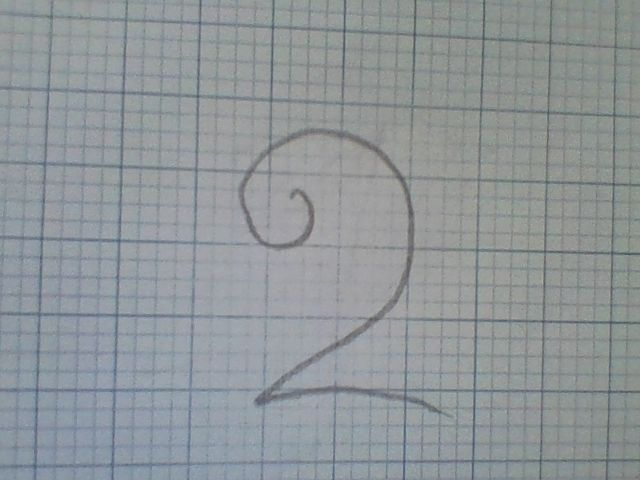


Number predicted:  [2] 



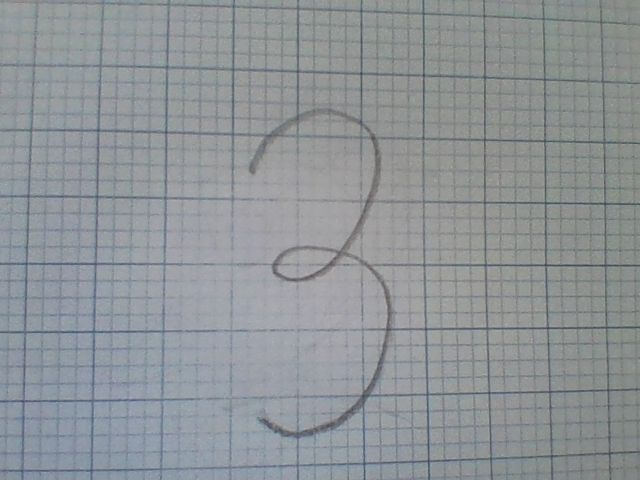


Number predicted:  [1] 



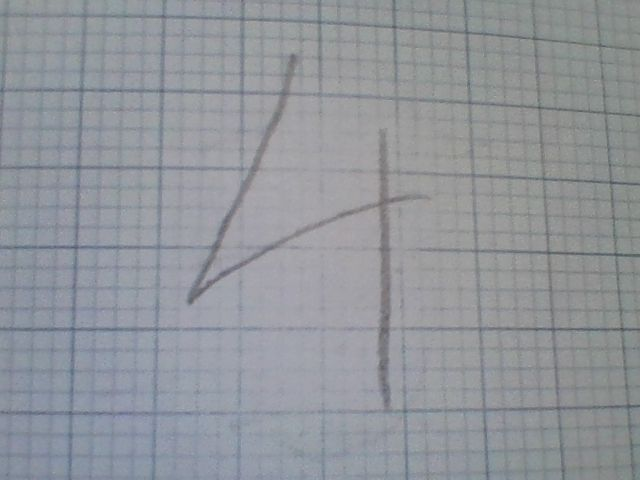


Number predicted:  [1] 



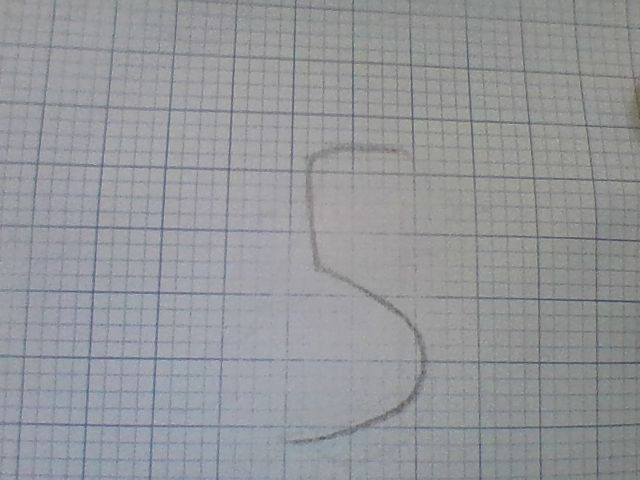


Number predicted:  [1] 



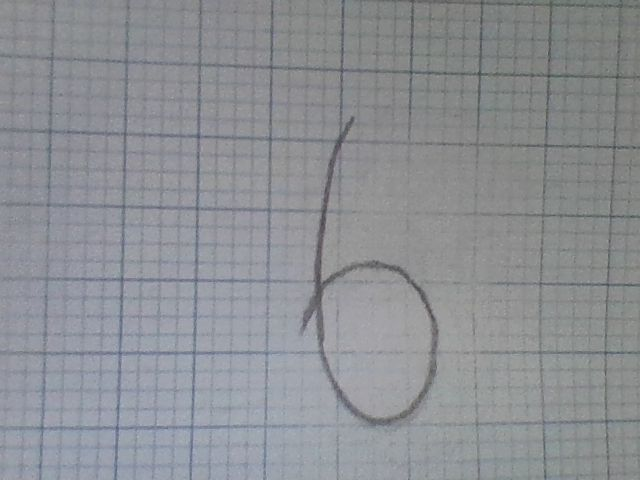


Number predicted:  [7] 



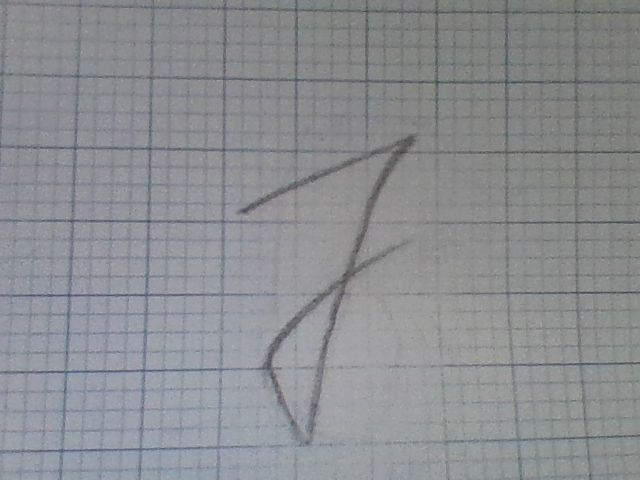


Number predicted:  [7] 



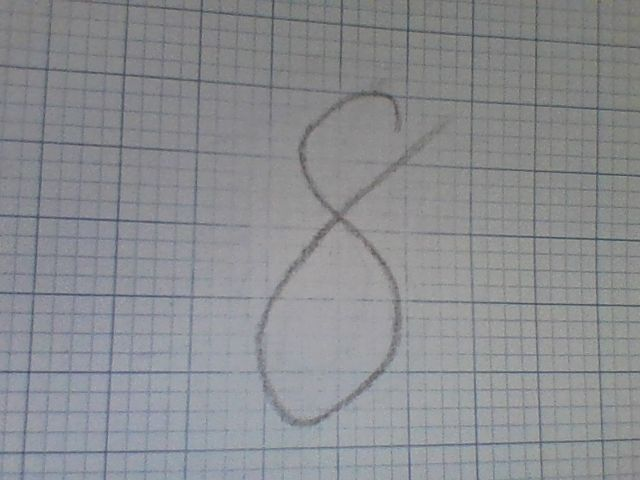


Number predicted:  [5] 

Correct 9/50


In [123]:
import cv2

Correct_Predicted = 0

for IMG in labeled_img:
  image = cv2.imread(IMG[1])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  ret, thresh_binary = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
  ret, thresh_binary = cv2.threshold(thresh_binary, 170, 255, cv2.THRESH_BINARY_INV)
  resize1 = cv2.resize(thresh_binary, (8, 8), interpolation = cv2.INTER_AREA)
  norm_image = cv2.normalize(resize1, None, alpha = 0, beta = 15, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
  reshape = norm_image.reshape(-1, 64)
  reshape.shape
  predict = clf.predict(reshape)
  display(Image(IMG[1]))
  if IMG[0] == predict:
    Correct_Predicted+=1
  print('\nNumber predicted: ',predict,'\n')
print(f'Correct {Correct_Predicted}/{len(labeled_img)}')

In [ ]:
""" IMGs prepared -> Label -> Predict (Cái này là dùng hình có sẵn)"""

import os
from IPython.display import Image

dir = 'Data' # Create a 'Data' directory conatains images

if not os.path.exists(dir):  # Check if directory existed or not
    os.makedirs(dir)

data_path = '/content/Data/'

if os.path.exists(dir):  # Check if "Data" directory existed or not
  labeled_img = os.listdir(data_path)
  for img in labeled_img:
    if img[-4:] != '.jpg':
      labeled_img.remove(img)
  print(*labeled_img)

img-3.jpg img-2.jpg


In [124]:
print(labeled_img)

[[1, 'Data/img-0.jpg'], [1, 'Data/img-4.jpg'], [3, 'Data/img-5.jpg'], [5, 'Data/img-6.jpg'], [4, 'Data/img-7.jpg'], [6, 'Data/img-8.jpg'], [7, 'Data/img-9.jpg'], [8, 'Data/img-10.jpg'], [9, 'Data/img-11.jpg'], [0, 'Data/img-12.jpg'], [2, 'Data/img-13.jpg'], [3, 'Data/img-14.jpg'], [4, 'Data/img-15.jpg'], [5, 'Data/img-16.jpg'], [6, 'Data/img-17.jpg'], [7, 'Data/img-18.jpg'], [7, 'Data/img-19.jpg'], [8, 'Data/img-20.jpg'], [9, 'Data/img-21.jpg'], [2, 'Data/img-22.jpg'], [7, 'Data/img-23.jpg'], [3, 'Data/img-24.jpg'], [1, 'Data/img-0.jpg'], [2, 'Data/img-1.jpg'], [2, 'Data/img-0.jpg'], [2, 'Data/img-25.jpg'], [4, 'Data/img-26.jpg'], [5, 'Data/img-27.jpg'], [6, 'Data/img-28.jpg'], [7, 'Data/img-29.jpg'], [9, 'Data/img-30.jpg'], [0, 'Data/img-31.jpg'], [1, 'Data/img-32.jpg'], [2, 'Data/img-33.jpg'], [3, 'Data/img-34.jpg'], [4, 'Data/img-35.jpg'], [5, 'Data/img-36.jpg'], [6, 'Data/img-37.jpg'], [7, 'Data/img-38.jpg'], [8, 'Data/img-39.jpg'], [9, 'Data/img-40.jpg'], [0, 'Data/img-41.jpg'], [

In [ ]:
import cv2

for IMG in labeled_img:
  image = cv2.imread(data_path + IMG)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  ret, thresh_binary = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
  ret, thresh_binary = cv2.threshold(thresh_binary, 170, 255, cv2.THRESH_BINARY_INV)
  resize1 = cv2.resize(thresh_binary, (8, 8), interpolation = cv2.INTER_AREA)
  norm_image = cv2.normalize(resize1, None, alpha = 0, beta = 15, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
  reshape = norm_image.reshape(-1, 64)
  reshape.shape
  predict = clf.predict(reshape)
  display(Image(data_path+IMG))
  print("\n",predict)